In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC

# External libraries
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv


In [2]:
df = pd.read_csv('/kaggle/input/credit-card-fraud-detection-dataset-2023/creditcard_2023.csv')
df.head(15)

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
5,5,0.025302,-0.140514,1.191138,-0.707979,0.430490,0.458973,0.611050,-0.092629,0.180811,...,-0.187739,-0.538518,-0.050465,-0.631553,-0.456480,0.252670,0.066681,0.095812,6901.49,0
6,6,1.016482,-0.397181,0.497868,-0.144463,0.331022,0.629243,0.431262,-0.134007,0.796159,...,-0.171137,-0.287017,-0.178197,-1.297597,1.182503,-0.604228,-0.198163,-0.087619,18954.45,0
7,7,-0.051306,-0.007194,1.139941,-0.877880,0.684668,0.714326,0.892615,-0.908409,0.901938,...,0.620676,-0.920426,0.034660,-1.091527,-0.742075,-0.104863,-1.382522,-2.748268,12298.23,0
8,8,-0.130680,-0.349547,0.425786,-0.760444,1.702777,2.324816,0.568968,0.049100,0.273118,...,-0.132787,-0.284700,-0.227779,2.248754,0.534846,-0.929738,-0.224385,0.243790,22052.90,0
9,9,0.058419,-0.093507,1.117270,-0.735172,0.466111,0.332371,0.683425,-0.136674,0.096409,...,-0.203634,-0.601581,-0.145082,-0.654783,-0.196621,0.226818,0.057119,0.100629,210.35,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [4]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,568630.000000,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,5.686300e+05,5.686300e+05,568630.000000,568630.000000,568630.000000,...,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,284314.500000,-5.118237e-17,-1.023647e-16,1.023647e-16,0.000000,2.559118e-17,2.559118e-17,0.000000,0.000000,0.000000,...,1.279559e-17,1.599449e-18,6.397796e-18,-2.559118e-17,-3.838678e-17,0.000000,-2.559118e-17,3.838678e-17,12041.957635,0.5
std,164149.486121,1.000001e+00,1.000001e+00,1.000001e+00,1.000001,1.000001e+00,1.000001e+00,1.000001,1.000001,1.000001,...,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001,1.000001e+00,1.000001e+00,6919.644449,0.5
min,0.000000,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222,-9.952786e+00,-2.111111e+01,-4.351839,-10.756342,-3.751919,...,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,142157.250000,-5.652859e-01,-4.866777e-01,-6.492987e-01,-0.656020,-2.934955e-01,-4.458712e-01,-0.283533,-0.192257,-0.568745,...,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-0.631895,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,284314.500000,-9.363846e-02,-1.358939e-01,3.528579e-04,-0.073762,8.108788e-02,7.871758e-02,0.233366,-0.114524,0.092526,...,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-0.011892,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,426471.750000,8.326582e-01,3.435552e-01,6.285380e-01,0.707005,4.397368e-01,4.977881e-01,0.525955,0.047299,0.559262,...,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,0.672888,3.340230e-01,4.095903e-01,18036.330000,1.0
max,568629.000000,2.229046e+00,4.361865e+00,1.412583e+01,3.201536,4.271689e+01,2.616840e+01,217.873038,5.958040,20.270062,...,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285,1.132311e+02,7.725594e+01,24039.930000,1.0


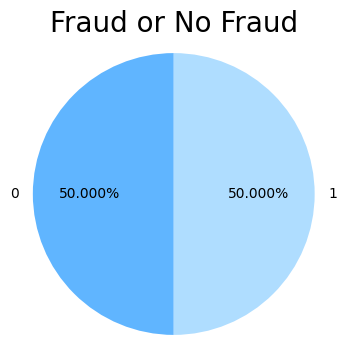

In [6]:
counts = df["Class"].value_counts().sort_index()

# Define colors (you can reuse your palette or create new ones)
colors = ["#60B5FF","#AFDDFF"]

# Create the pie chart
plt.figure(figsize=(4 , 4))
plt.pie(
    counts,
    labels=counts.index,
    autopct='%1.3f%%',
    startangle=90,
    colors=colors[:len(counts)]  # match number of quality levels
)

plt.title("Fraud or No Fraud", fontsize=20)
plt.axis('equal')  # Make the pie chart circular
plt.show()

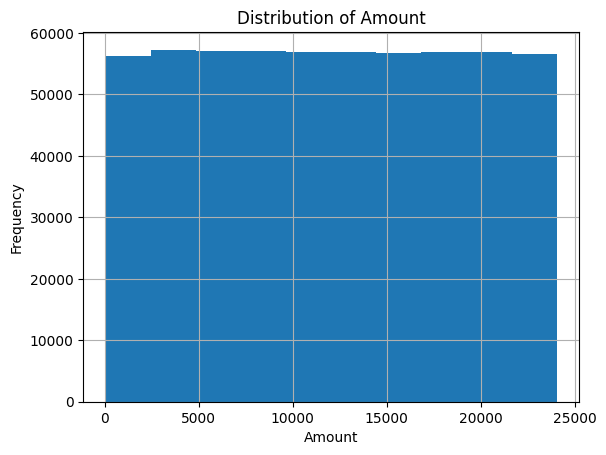

In [7]:
df['Amount'].hist()

# Add labels and title for clarity
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Amount')

# Display the plot
plt.show()

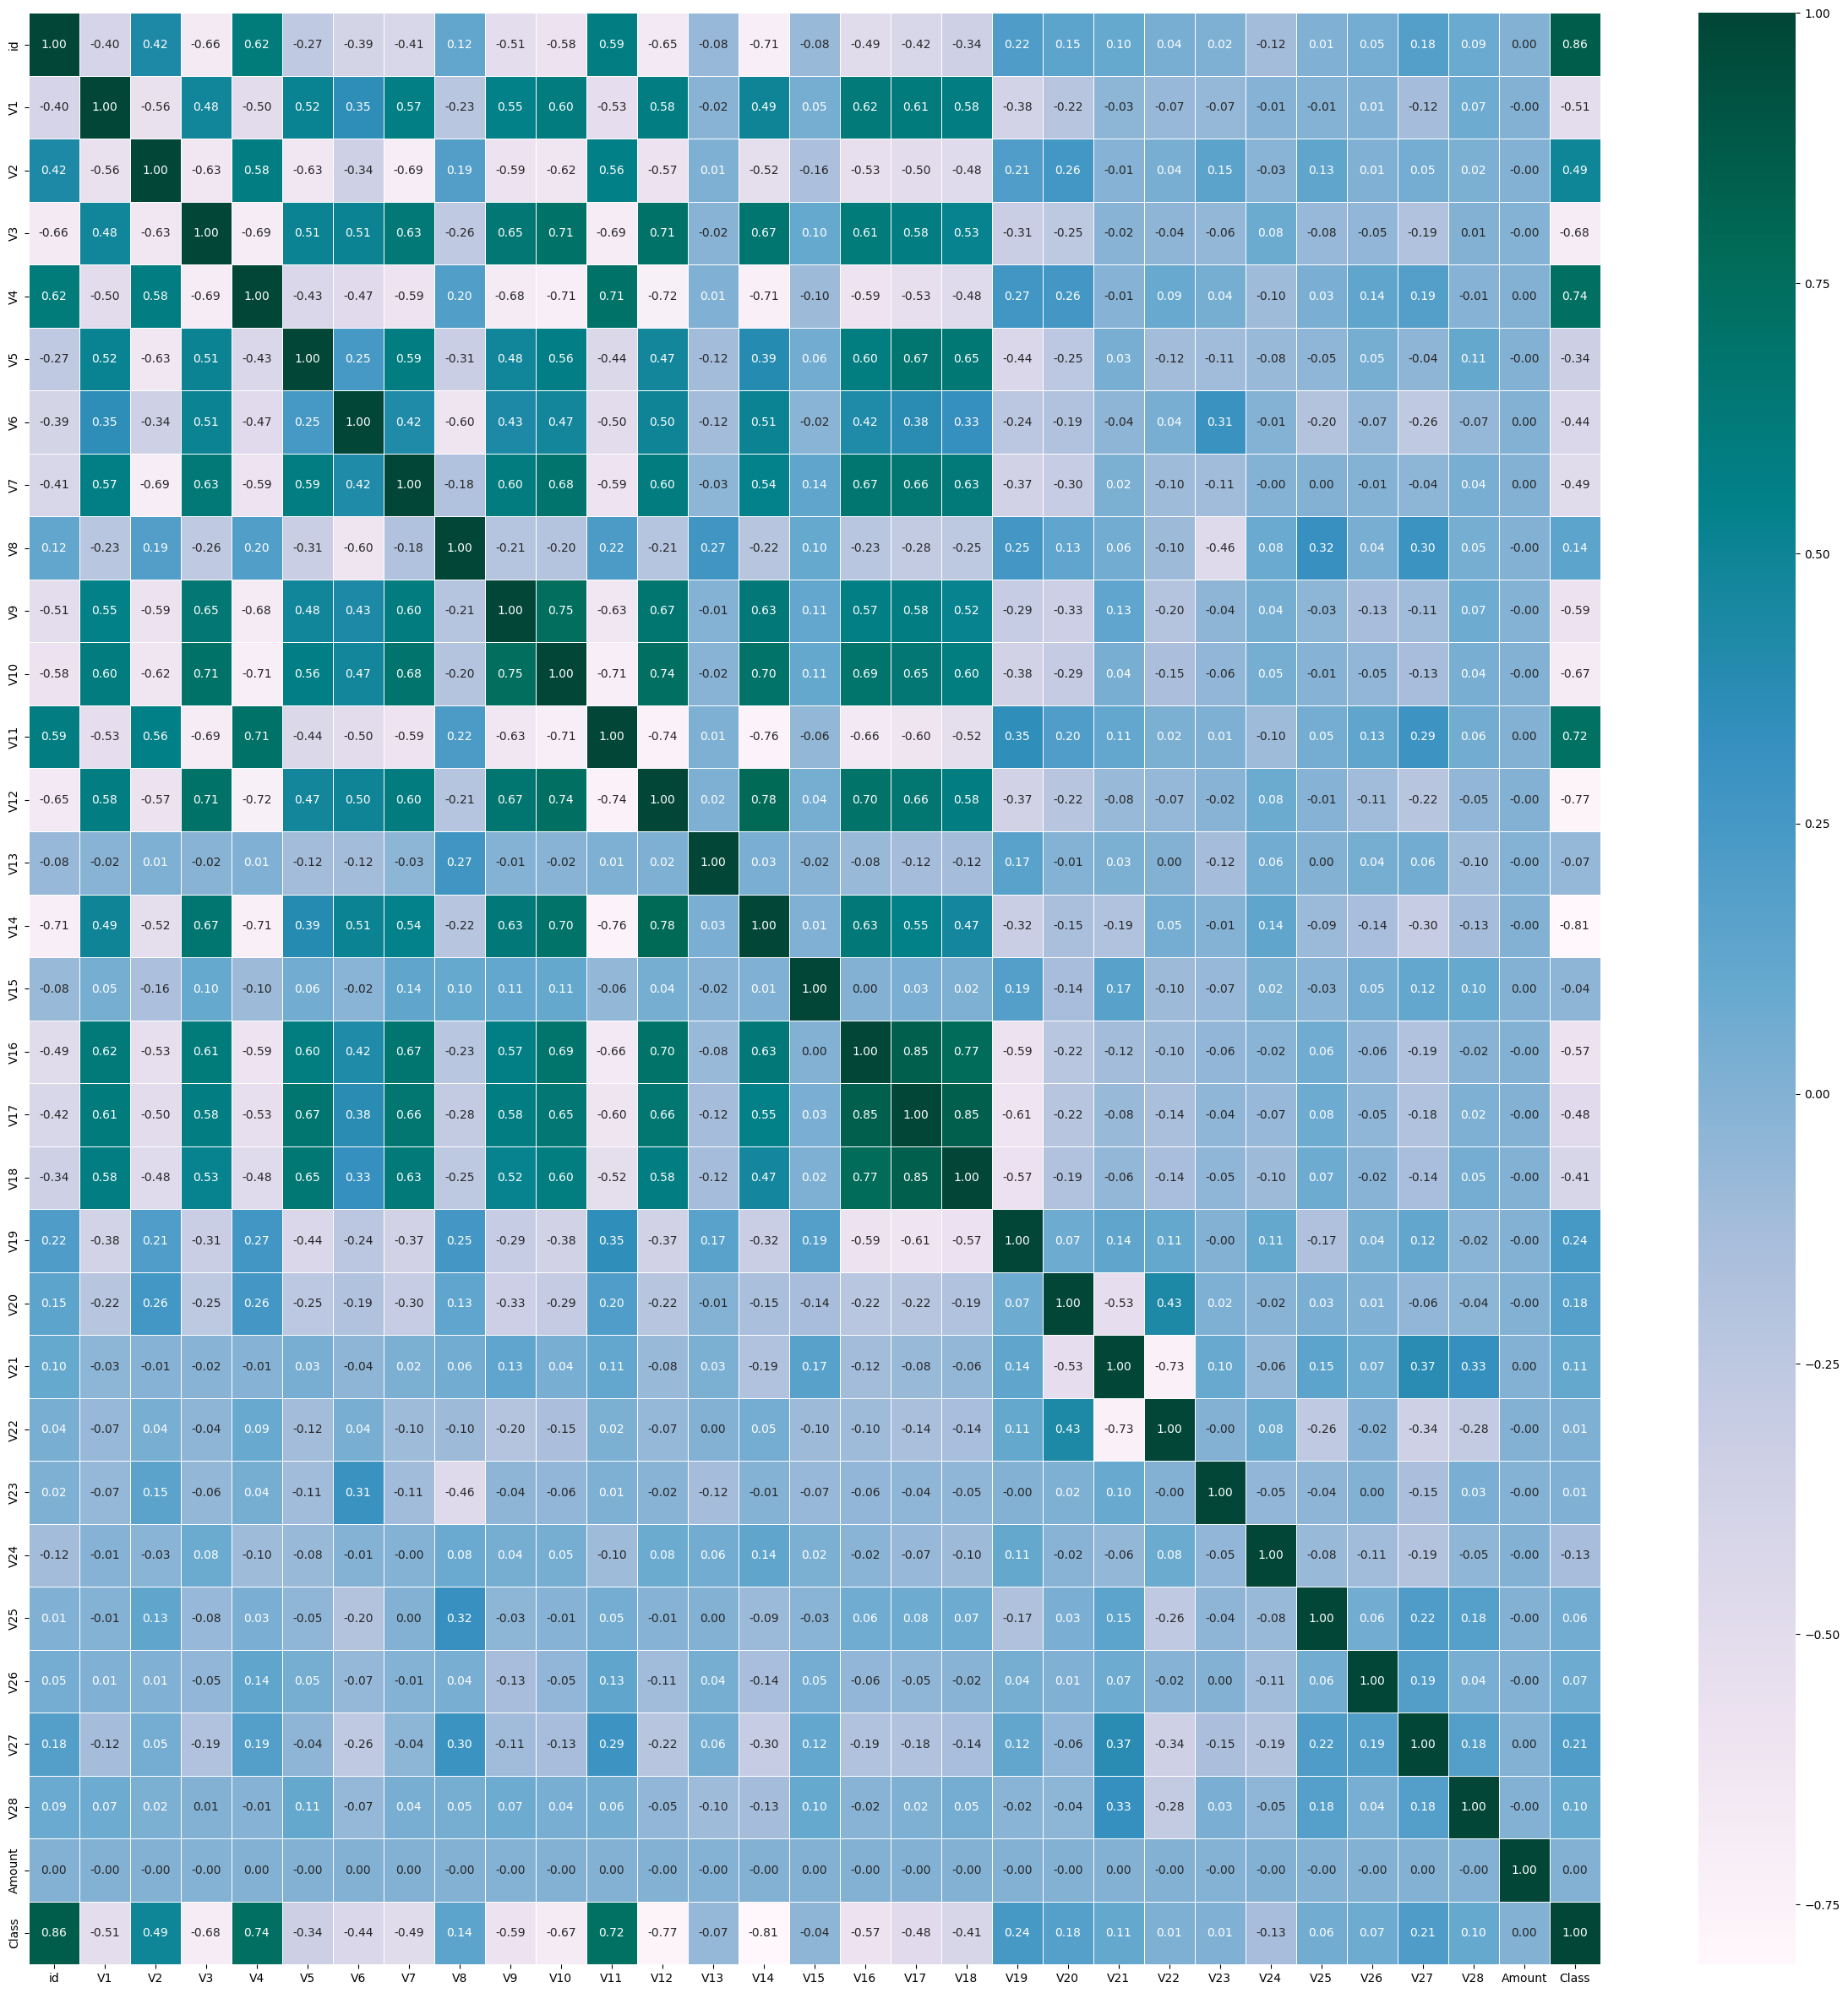

In [8]:
correlation_matrix = df.corr()
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='PuBuGn', linewidths = 0.55, fmt=".2f")
plt.rcParams.update()
plt.show()

In [9]:
X = df.drop(columns = ["Class", "id"])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# 1. Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model1 = LogisticRegression(C=1.0, penalty='l2', solver='liblinear')
model1.fit(X_train_scaled, y_train)
pred1 = model1.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, pred1))

Logistic Regression Accuracy: 0.9652498109491233


In [11]:
# 2. Decision Tree Classifer
model2 = DecisionTreeClassifier(max_depth=5, criterion='gini', random_state=42)
model2.fit(X_train, y_train)
pred2 = model2.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, pred2))

Decision Tree Accuracy: 0.9602817297715562


In [12]:
#3. Random Forest Classifer

model3 = RandomForestClassifier(
    n_estimators=50,
    max_depth=12,
    max_samples=0.3,
    n_jobs=-1,
    random_state=42
)
model3.fit(X_train, y_train)
pred3 = model3.predict(X_test)


In [13]:
#4. LightGBM (fast gradient boosting)
model4 = LGBMClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=-1,
    subsample=0.8,
    n_jobs=-1
)
model4.fit(X_train, y_train)
pred4 = model4.predict(X_test)

[LightGBM] [Info] Number of positive: 227339, number of negative: 227565
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.074954 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 454904, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499752 -> initscore=-0.000994
[LightGBM] [Info] Start training from score -0.000994


In [14]:
#5. XGBoost - Gradient Boosting
model5 = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    tree_method='hist',
    n_jobs=-1,
    use_label_encoder=False,
    eval_metric='logloss'
)
model5.fit(X_train, y_train)
pred5 = model5.predict(X_test)

In [15]:
#6. SGD Classifer
from sklearn.linear_model import SGDClassifier

model6 = SGDClassifier(loss='hinge', max_iter=1000, tol=1e-3, n_jobs=-1)
model6.fit(X_train_scaled, y_train)
pred6 = model6.predict(X_test_scaled)
print("SGDClassifier (Linear SVM) Accuracy:", accuracy_score(y_test, pred6))

SGDClassifier (Linear SVM) Accuracy: 0.965029984348346


In [16]:
#8. Naive Bayes
model8 = GaussianNB()
model8.fit(X_train, y_train)
pred8 = model8.predict(X_test)

In [17]:
#9. Neural Networks
model9 = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=200, solver='adam', random_state=42)
model9.fit(X_train_scaled, y_train)
pred9 = model9.predict(X_test_scaled)

In [18]:
#10. Voting Classifier (fast ensemble)
model10 = VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=300, solver='saga')),
    ('rf', RandomForestClassifier(n_estimators=30, max_depth=10)),
    ('lgb', LGBMClassifier(n_estimators=100))
], voting='hard', n_jobs=-1)

model10.fit(X_train, y_train)
pred10 = model10.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


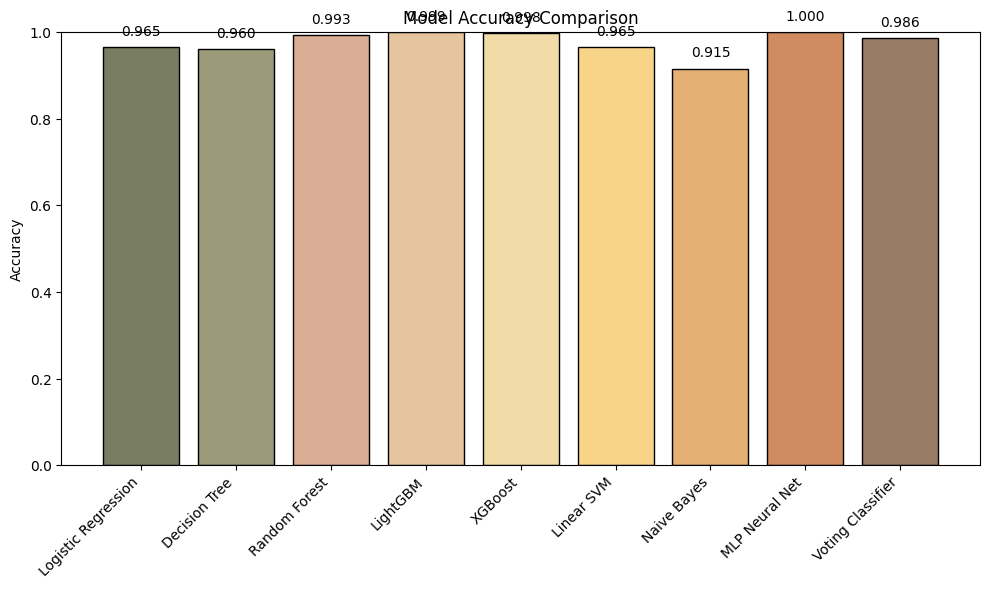

In [19]:
models = {
    "Logistic Regression": pred1,
    "Decision Tree": pred2,
    "Random Forest": pred3,
    "LightGBM": pred4,
    "XGBoost": pred5,
    "Linear SVM": pred6,
    "Naive Bayes": pred8,
    "MLP Neural Net": pred9,
    "Voting Classifier": pred10
}

# Calculate accuracies
accuracies = {name: accuracy_score(y_test, pred) for name, pred in models.items()}

# Colors from your palette (use as many as needed)
colors = [
    "#797D62",
    "#9B9B7A",
    "#D9AE94",
    "#E5C59E",
    "#F1DCA7",
    "#F8D488",
    "#E4B074",
    "#D08C60",
    "#997B66"
]

# Plot
plt.figure(figsize=(10,6))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=colors, edgecolor='black')

plt.ylim(0,1)  # Accuracy ranges between 0 and 1
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45, ha='right')

# Add accuracy values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.02, f"{height:.3f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()